## Secondo Progetto Big Data

**Gruppo:** Cassano Nicola, Roscica Riccardo, Sparapano Dario

**Dataset:** TII-SSRC-23 Dataset

In [18]:
#Importo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Prima analisi del Dataset

In questa fase si effettua una **pulizia e campionamento del dataset** per bilanciare il numero di esempi per classe e ridurre il carico computazionale:

1. Si contano le istanze per ciascuna etichetta (`Traffic Subtype`).
2. Vengono selezionate solo le etichette con **almeno 10.000 campioni**, considerate statisticamente rilevanti.
3. Da queste, si estrae un **campione casuale dello 0.5%** per ridurre la dimensionalità.
4. I dati appartenenti alle classi meno rappresentate (< 10.000) vengono **mantenuti per intero**, così da non perderli.
5. Si ricompone il dataset unendo il campione delle classi maggiori con tutti i dati delle classi minori.

Questo approccio permette di **bilanciare la varietà del dataset** mantenendo la rappresentatività delle classi meno frequenti, ma contenendo la dimensione complessiva dei dati.



In [19]:
df = pd.read_csv('data.csv')

label_counts = df['Traffic Subtype'].value_counts()
#Effettuo un taglio verticale del set mantiendo le etichette con almeno 10000 campioni
valid_labels = label_counts[label_counts > 10000].index
df_filtered = df[df['Traffic Subtype'].isin(valid_labels)]
#Campiono lo 0.5% dei dati
df_sampled = df_filtered.sample(frac=0.05, random_state=42)
df_dropped = df[~df['Traffic Subtype'].isin(valid_labels)]
df = pd.concat([df_sampled, df_dropped], ignore_index=True)

Dopo aver filtrato il dataset visualizzo le prime e ultime 5 righe del csv:

In [20]:
#Opzione per visualizzare tutte le colonne
pd.set_option("display.max_columns", None)
#Opzione per visualizzare tutte le righe
pd.set_option('display.max_rows', None)

# Visualizza le prime 5 righe del DataFrame
display(df.head(5))
# Visualizza le ultime 5 righe del DataFrame
display(df.tail(5))

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
0,192.168.1.70-192.168.1.90-65079-0-6,192.168.1.70,65079.0,192.168.1.90,0,6.0,01/01/1970 10:45:16 PM,38650231.0,2.0,0.0,100.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,2.587307,0.051746,38650231.0,0.0,38650231.0,38650231.0,38650231.0,38650231.0,0.0,38650231.0,38650231.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.051746,0.000000,50.0,50.0,50.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,75.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,100.0,0.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,38650231.0,0.0,38650231.0,38650231.0,Malicious,DoS,DoS ECN
1,192.168.1.70-192.168.1.90-50433-0-6,192.168.1.70,50433.0,192.168.1.90,0,6.0,01/01/1970 04:59:36 AM,53663.0,1.0,1.0,500.0,0.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,9317.406779,37.269627,53663.0,0.0,53663.0,53663.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0,20.0,18.634814,18.634814,0.0,500.0,333.333333,288.675135,83333.333333,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS PSH
2,192.168.1.70-192.168.1.90-51949-0-6,192.168.1.70,51949.0,192.168.1.90,0,6.0,03/01/1970 04:01:25 AM,40134.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,1245.826481,49.833059,40134.0,0.0,40134.0,40134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,24.916530,24.916530,0.0,50.0,33.333333,28.867513,833.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS ECN
3,192.168.1.70-192.168.1.90-1224-0-6,192.168.1.70,1224.0,192.168.1.90,0,6.0,01/01/1970 04:48:00 AM,24984.0,1.0,1.0,50.0,0.0,50.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,2001.280820,80.051233,24984.0,0.0,24984.0,24984.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,40.025616,40.025616,0.0,50.0,33.333333,28.867513,833.333333,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Malicious,DoS,DoS SYN
4,192.168.1.70-192.168.1.90-9575-0-6,192.168.1.70,9575.0,192.168.1.90,0,6.0,03/01/1970 04:10:33 AM,20005465.0,2.0,0.0,1000.0,0.0,500.0,500.0,500.0,0.0,0.0,0.0,0.0,0.0,49.986341,0.099973,20005465.0,0.0,20005465.0,20005465.0,20005465.0,20005465.0,0.0,20005465.0,20005465.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.099973,0.000000,500.0,500.0,500.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,750.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1000.0,0.0,0.0,512.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,20005465.0,0.0,20005465.0,20005465.0,Malicious,DoS,DoS ECN


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Traffic Type,Traffic Subtype
79028,192.168.1.70-192.168.1.90-37479-1234-17,192.168.1.70,37479.0,192.168.1.90,1234,17.0,02/01/1970 04:44:54 AM,22485411.0,2307.0,0.0,3036012.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,135021.414552,102.599859,9.750829e+03,2.943433e+03,34364.0,30.0,22485411.0,9.750829e+03,2.943433e+03,34364.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18456.0,0.0,102.599859,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.570438,1316.0,0.0,0.0,0.0,0.0,3036012.0,2307.0,135021.0,0.0,0.0,0.0,0.0,0.0,0.0,2306.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79029,136.162.16.0-255.255.255.1-0-0-0,136.162.16.0,0.0,255.255.255.1,0,0.0,02/01/1970 04:45:08 AM,65027682.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.138403,8.128460e+06,1.382986e+07,38099180.0,403.0,65027682.0,8.128460e+06,1.382986e+07,38099180.0,403.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3586913.0,0.0,3586913.0,3586913.0,28925934.5,1.297293e+07,38099180.0,19752689.0,Benign,Video,Video UDP
79030,192.168.1.70-192.168.1.90-57042-1234-17,192.168.1.70,57042.0,192.168.1.90,1234,17.0,02/01/1970 04:45:18 AM,49795393.0,5256.0,0.0,6916896.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,138906.344207,105.551933,9.475812e+03,4.683333e+04,482563.0,0.0,49795393.0,9.475812e+03,4.683333e+04,482563.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42048.0,0.0,105.551933,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1316.250381,1316.0,0.0,0.0,0.0,0.0,6916896.0,5256.0,138906.0,0.0,0.0,0.0,0.0,0.0,0.0,5255.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79031,192.168.1.70-192.168.1.90-57890-1234-17,192.168.1.70,57890.0,192.168.1.90,1234,17.0,02/01/1970 04:46:10 AM,8809176.0,596.0,0.0,784336.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,89036.250383,67.656725,1.480534e+04,6.279618e+04,773425.0,0.0,8809176.0,1.480534e+04,6.279618e+04,773425.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4768.0,0.0,67.656725,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1318.208054,1316.0,0.0,0.0,0.0,0.0,784336.0,596.0,89036.0,0.0,0.0,0.0,0.0,0.0,0.0,595.0,8.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign,Video,Video UDP
79032,192.168.1.70-192.168.1.90-53417-1234-17,192.168.1.70,53417.0,192.168.1.90,1234,17.0,02/01/1970 04:46:19 AM,2856556.0,477.0,0.0,627732.0,0.0,1316.0,1316.0,1316.0,0.0,0.0,0.0,0.0,0.0,219751.336925,166.984299,6.001168e+03,3.897524e+03,25978.0,17.0,2856556.0,6.001168e+03,3.897524e+03,25978.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

##  Analisi Grafica delle Etichette del Dataset

I seguenti grafici mostrano la **distribuzione delle categorie nel dataset**, permettendo di visualizzare eventuali **sbilanciamenti tra le classi**. Questo tipo di analisi è fondamentale per capire **quanto il dataset sia equilibrato** prima dell'addestramento dei modelli di machine learning.

- **Grafico 1**: distribuzione generale delle etichette (`Label`) — utile per una visione binaria (malicious/benign).
- **Grafico 2**: distribuzione per tipo di traffico (`Traffic Type`) — permette di osservare la frequenza delle macro-categorie di traffico.
- **Grafico 3**: distribuzione per sottotipo di traffico (`Traffic Subtype`) — mostra in dettaglio la varietà e la numerosità delle classi più granulari.


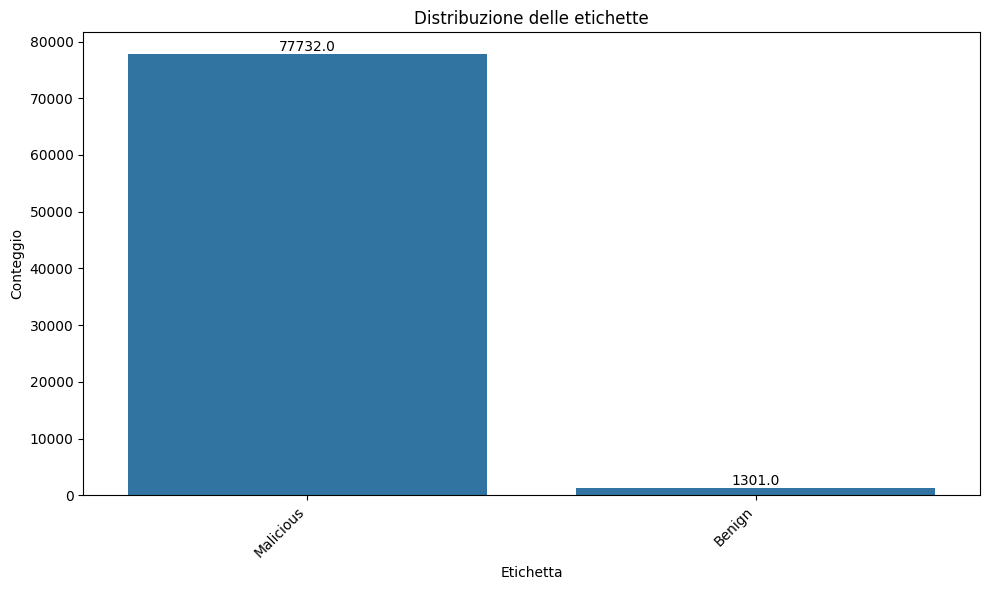

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Label', data=df)
plt.title('Distribuzione delle etichette')
plt.xlabel('Etichetta')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')

# Aggiungi i numeri di conteggio sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

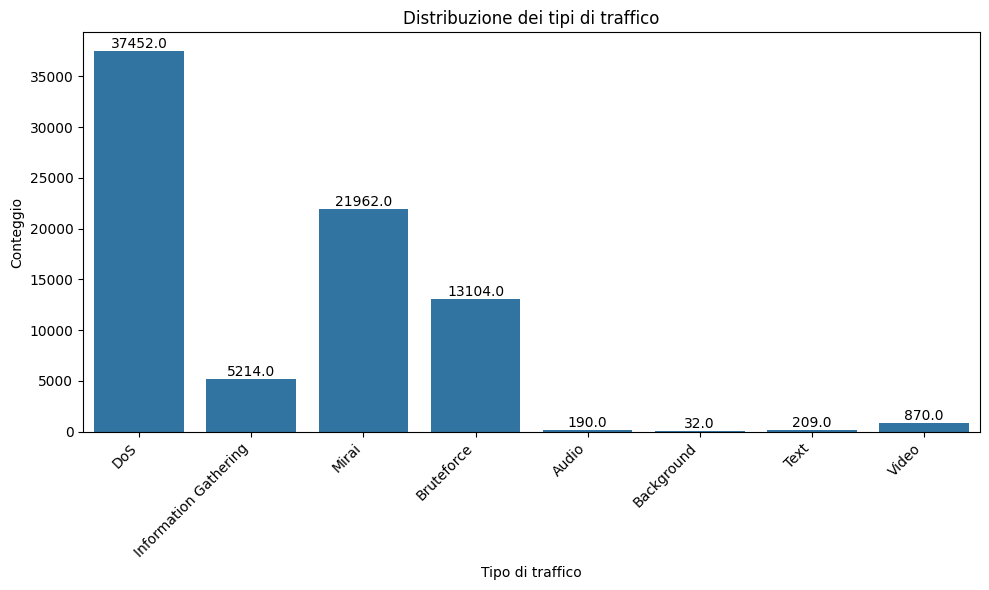

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Type', data=df)
plt.title('Distribuzione dei tipi di traffico')
plt.xlabel('Tipo di traffico')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')

# Aggiungi i numeri di conteggio sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

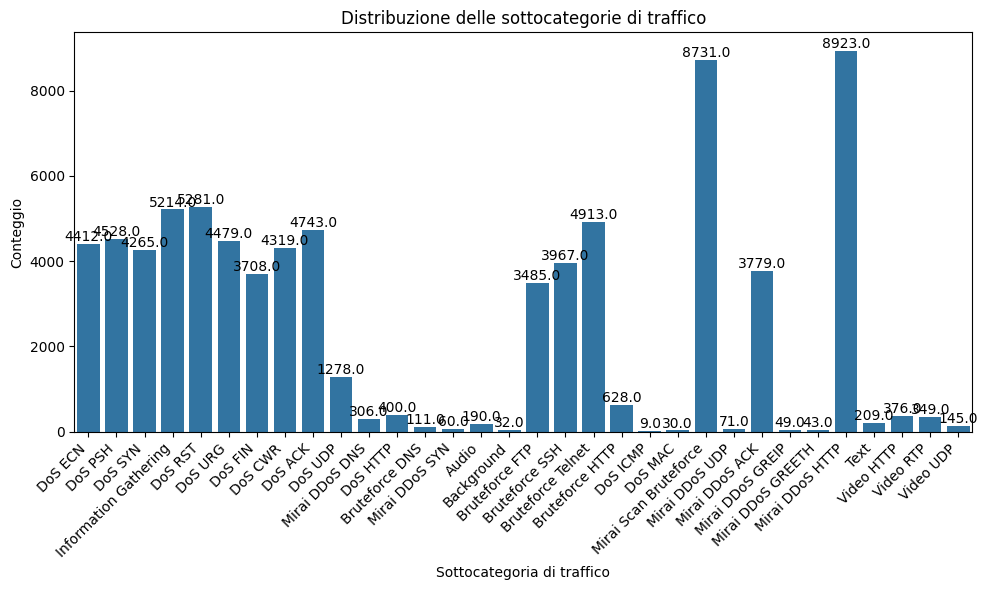

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Traffic Subtype', data=df)
plt.title('Distribuzione delle sottocategorie di traffico')
plt.xlabel('Sottocategoria di traffico')
plt.ylabel('Conteggio')
plt.xticks(rotation=45, ha='right')

# Aggiungi i numeri di conteggio sopra le barre
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


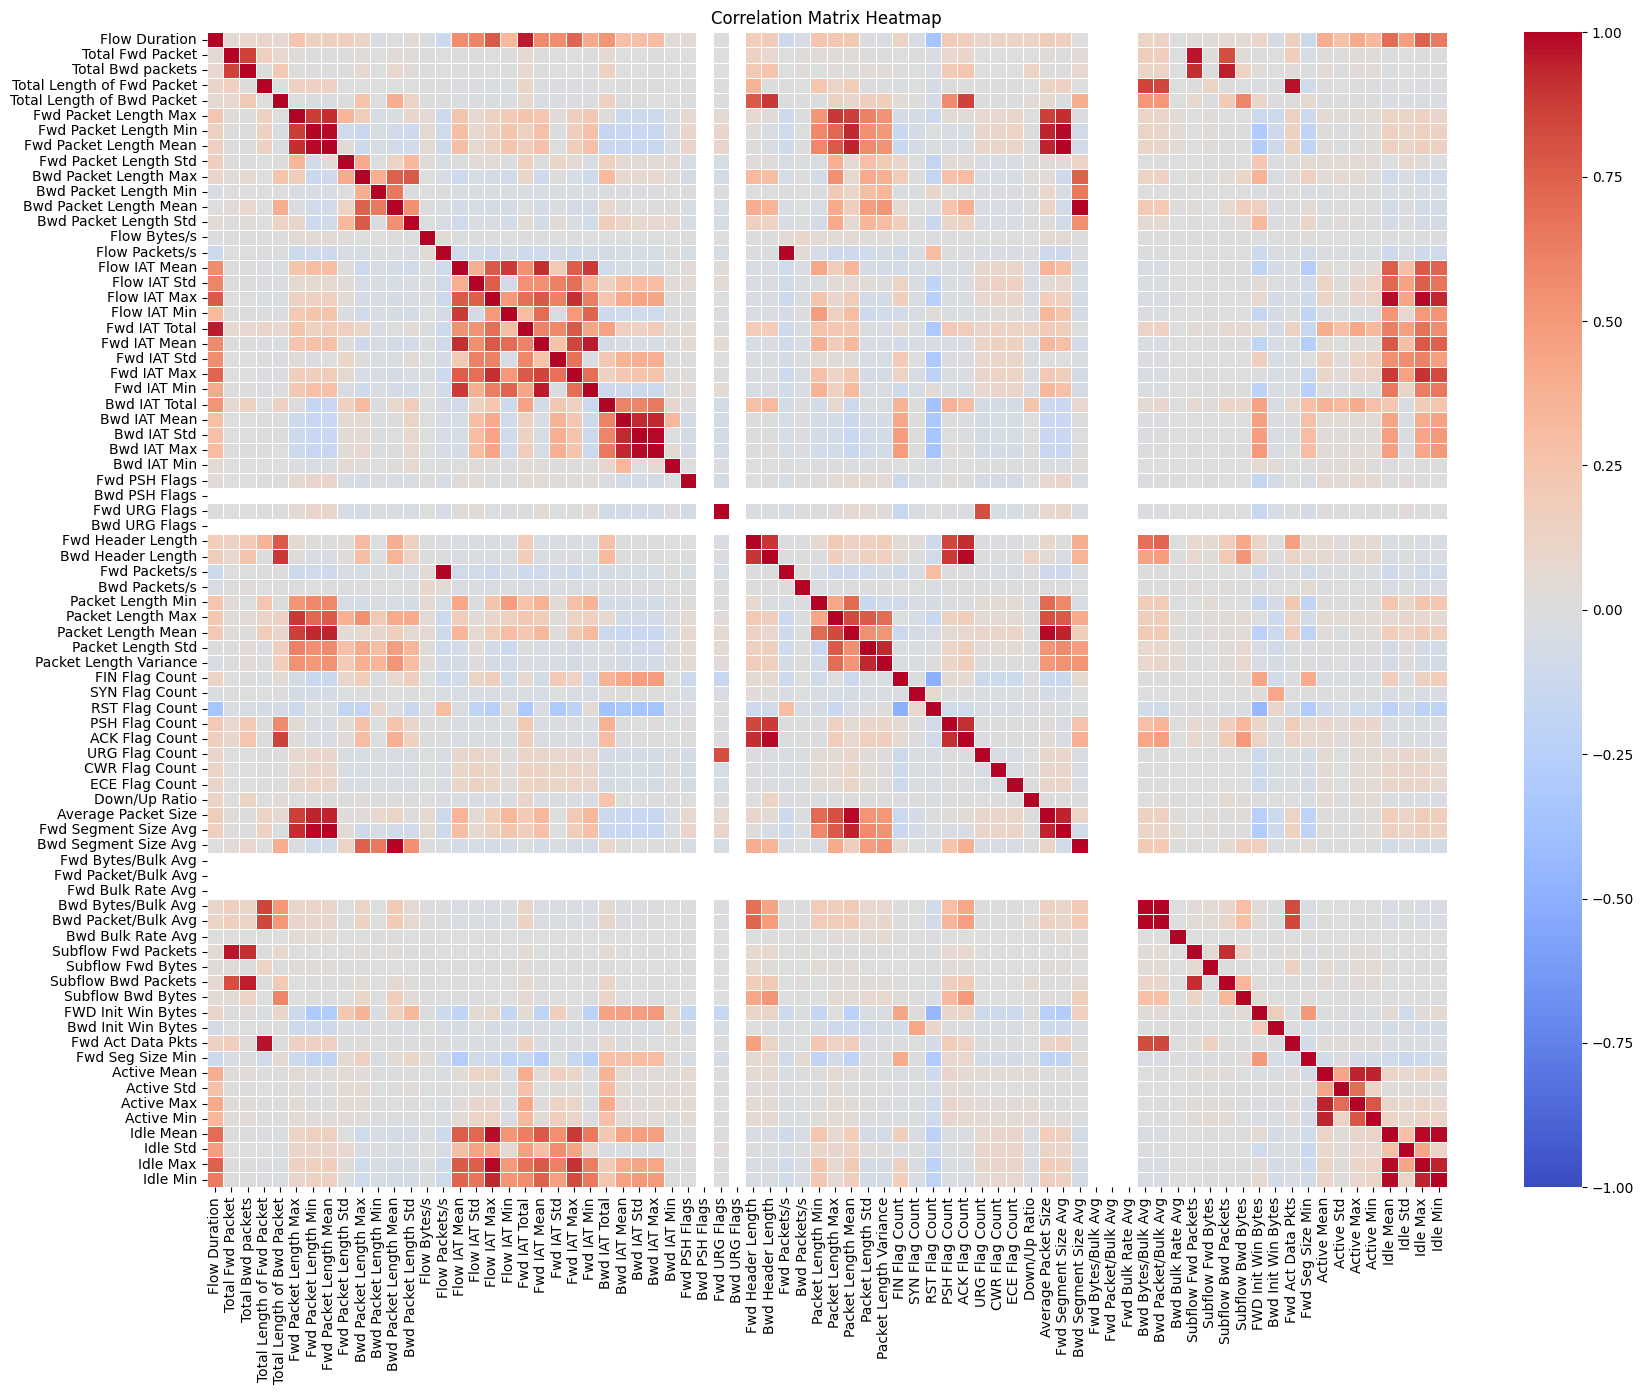

In [24]:
corr_df= df.drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port', 'Dst Port', 'Protocol', 'Timestamp', 'Label', 'Traffic Type', 'Traffic Subtype'])

#Calcolo matrice di correlazione
corr_df = corr_df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_df, annot=False, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Pulizia e Preparazione dei Dati

Dopo un analisi grafica vengono effettuati alcuni passaggi fondamentali per la **pulizia e la preparazione del dataset**, garantendo un costo computazionale consono per le nostre macchine:

-  **Rimozione delle colonne irrilevanti**: si eliminano attributi identificativi come indirizzi IP, porte e timestamp (`DROP_COLUMNS`), che potrebbero introdurre bias o non essere generalizzabili.
-  **Arrotondamento numerico**: si arrotondano i valori a 3 cifre decimali per ridurre la sensibilità numerica durante la rimozione dei duplicati.
-  **Rimozione dei duplicati**: si eliminano le righe duplicate che possono influenzare negativamente il modello.
-  **Eliminazione delle etichette collegate**: in base alla variabile target scelta (`Traffic Subtype` in questo caso), si rimuovono le etichette gerarchicamente correlate (`Label` e `Traffic Type`) per evitare **data leakage** durante l’addestramento.


In [25]:
# Variabile target
TARGET_VARIABLE = 'Traffic Subtype'

# Colonne da rimuovere in base al target
TARGET_TO_DROP = {
    'Label': ['Traffic Type', 'Traffic Subtype'],
    'Traffic Type': ['Label', 'Traffic Subtype'],
    'Traffic Subtype': ['Label', 'Traffic Type']
}

# Colonne costanti, da rimuovere
CONSTANT_FEATURES = [
    "Bwd PSH Flags",
    "Bwd URG Flags",
    "Fwd Bytes/Bulk Avg",
    "Fwd Packet/Bulk Avg",
    "Fwd Bulk Rate Avg"
]

# Colonne fortemente correlate, da rimuovere
HIGHLY_CORRELATED_FEATURES = [
    "ACK Flag Count",
    "Active Max",
    "Active Min",
    "Average Packet Size",
    "Bwd Bytes/Bulk Avg",
    "Bwd Header Length",
    "Bwd IAT Max",
    "Bwd IAT Min",
    "Bwd IAT Std",
    "Bwd Packet Length Mean",
    "Bwd Packet Length Std",
    "Bwd Packet/Bulk Avg",
    "Bwd Segment Size Avg",
    "Flow IAT Max",
    "Flow IAT Mean",
    "Flow IAT Min",
    "Fwd Act Data Pkts",
    "Fwd Header Length",
    "Fwd IAT Max",
    "Fwd IAT Mean",
    "Fwd IAT Min",
    "Fwd IAT Total",
    "Fwd Packet Length Mean",
    "Fwd Packet Length Min",
    "Fwd Packets/s",
    "Fwd Segment Size Avg",
    "Idle Max",
    "Idle Mean",
    "Idle Min",
    "PSH Flag Count",
    "Packet Length Max",
    "Packet Length Mean",
    "Packet Length Variance",
    "Subflow Bwd Packets",
    "Subflow Fwd Packets",
    "URG Flag Count"
]

# Colonne della 5-tupla + timestamp da rimuovere
DROP_COLUMNS = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Timestamp']

# Rimuovi le colonne, solo se esistono
df = df.drop(columns=[col for col in DROP_COLUMNS if col in df.columns])
df = df.drop(columns=[col for col in CONSTANT_FEATURES if col in df.columns])
df = df.drop(columns=[col for col in HIGHLY_CORRELATED_FEATURES if col in df.columns])

# Arrotonda per normalizzare e rimuove i duplicati
df = df.round(3)
df = df.drop_duplicates()

# Rimuove le colonne legate al target (ad esempio, altre etichette)
df = df.drop(columns=[col for col in TARGET_TO_DROP[TARGET_VARIABLE] if col in df.columns])

# Stampa la shape finale
print("Shape finale del DataFrame:", df.shape)


Shape finale del DataFrame: (75211, 37)


Import delle librerie necessarie per l'addestramento e valutazione dei vari modelli:


In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

##  Preprocessing

In questa parte si eseguono tutti i passaggi chiave per preparare il dataset all’addestramento dei modelli:

1.  **Separazione del target (`y`) dalle caratteristiche (`X`)**:
   - Il target scelto è `Traffic Subtype`.
2.  **Codifica del target**:
   - Utilizzo di `LabelEncoder` per convertire le etichette in valori numerici.
3.  **Suddivisione del dataset**:
   - Il dataset viene suddiviso in training e test set con una proporzione di 70% - 30%, mantenendo la distribuzione delle classi (`stratify`).
4.  **Identificazione delle colonne**:
   - Vengono distinte le **feature numeriche** da quelle **categoriche**.
5.  **Definizione delle pipeline di trasformazione**:
   - *Numeriche*: Imputazione della media e normalizzazione (StandardScaler).
   - *Categoriche*: Imputazione del valore più frequente e codifica One-Hot.
6.  **Costruzione del preprocessore completo** con `ColumnTransformer` e applicazione ai dati.

Questi passaggi sono fondamentali per garantire che i dati siano omogenei, completi e pronti per i modelli di Machine Learning.


In [27]:
# Separa le caratteristiche (features) dal target
X = df.drop(TARGET_VARIABLE, axis=1)
y = df[TARGET_VARIABLE]

# Codifica il target
le = LabelEncoder()
y = le.fit_transform(y)

# Suddivide il dataset in training e test set --> uso un semplice spitting 30% test e 70% train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Identifica le colonne numeriche e categoriche
numerical_cols = X_train.select_dtypes(include=[np.number]).columns.to_list()
categorical_cols = X_train.select_dtypes(include=[object]).columns.to_list()

#Trasformazione dei dati numerici
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Sostituisce i valori mancanti con la media
    ('scaler', StandardScaler())  # Normalizza le caratteristiche numeriche
])

#Conversione dei dati categorici
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Sostituisce i valori mancanti con il valore più frequente
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codifica one-hot le caratteristiche categoriche
])

#Preprocessor - Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Applica il pre-processing ai dati di training e test
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)


Per contrastare il problema della **class imbalance** (squilibrio tra le classi nel dataset), viene applicato **SMOTE (Synthetic Minority Over-sampling Technique)** sui dati di addestramento:

- SMOTE genera nuovi esempi sintetici per le classi minoritarie.
- La strategia `'auto'` indica che tutte le classi con meno campioni rispetto alla maggioritaria verranno sovracampionate fino a pareggiare.
- Il `random_state` è fissato a 42 per garantire la riproducibilità del processo.

In [28]:
# Applica SMOTE ai dati di addestramento per bilanciare le classi
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Random Forest

Vengono addestrati **tre modelli Random Forest**, ciascuno con una diversa combinazione di iperparametri per esplorare il loro impatto sulle performance predittive:

- 🔹 `n_estimators`: numero di alberi nella foresta (più alberi = maggiore stabilità ma maggiore costo computazionale).
- 🔹 `max_depth`: profondità massima degli alberi (modelli più profondi possono catturare maggiore complessità ma rischiano overfitting).
- 🔹 `min_samples_split`: numero minimo di campioni richiesti per dividere un nodo interno.
- 🔹 `min_samples_leaf`: numero minimo di campioni richiesti in un nodo foglia.

Tutti i modelli vengono salvati in un dizionario chiamato `models` per poter essere successivamente analizzati e confrontati.

In [29]:
# Dizionario per salvare i modelli
models = {}
hyperparameters = [
    {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},  # Modello base con complessità moderata
    {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 4},  # Modello ad alta complessità
    {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1}  # Massima profondità, vincoli minimi
]

# Ciclo per creare e addestrare 3 modelli
for i in range(3):
    # Crea e addestra il modello
    model = RandomForestClassifier(random_state=42, verbose=0, n_jobs=-1, **hyperparameters[i])
    model.fit(X_train, y_train)

    # Salva il modello nel dizionario con un nome univoco
    models[f'rdfor{i+1}'] = model

# Stampa di conferma
print("Modelli addestrati e salvati nel dizionario 'models'.")


Modelli addestrati e salvati nel dizionario 'models'.


Calcolo le metriche relative ad: `accuracy`, `f1`, `precision`, `curva ROC`, `matrice di confusione` e `classification report` per valutare il modello addestrato.

In [30]:
# Inizializza i dizionari per memorizzare i risultati
accuracy_ = {}
f1_ = {}
precision_ = {}
recall_ = {}
roc_auc_ = {}
confusion_matrix_ = {}
classification_reports_ = {}

# Ciclo attraverso i modelli rdfor1, rdfor2, rdfor3
for i in range(1, 4):
    model_name = f'rdfor{i}'
    
    # Predizione utilizzando il modello
    y_pred = models[model_name].predict(X_test)
    
    # Calcola le metriche di valutazione
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    # Gestisce il calcolo dell'ROC AUC per più classi
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro')
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, y_pred) 
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)


In [31]:
# Valuta rdfor1
model_name = 'rdfor3'  # Specifica il nome del modello
print("Modello:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Matrice di Confusione:\n", confusion_matrix_[model_name])
print("Report di Classificazione:\n", classification_reports_[model_name])

Modello: rdfor3
Accuracy: 0.9839124268746676
F1 Score: 0.9085597011811215
Precision: 0.9043301615877645
Recall: 0.9199503738176875
ROC AUC: 0.9942647006287078
Matrice di Confusione:
 [[ 54   0   0 ...   0   0   0]
 [  3   7   0 ...   0   0   0]
 [  0   0  33 ...   0   0   0]
 ...
 [  1   0   0 ...  99   1   0]
 [  1   0   0 ...   1 103   0]
 [  0   0   0 ...   0   0  42]]
Report di Classificazione:
               precision    recall  f1-score   support

           0       0.73      0.95      0.82        57
           1       1.00      0.70      0.82        10
           2       1.00      1.00      1.00        33
           3       1.00      0.99      1.00      1045
           4       1.00      0.99      1.00       188
           5       1.00      1.00      1.00      1178
           6       0.97      0.97      0.97      1461
           7       0.99      1.00      0.99      1419
           8       1.00      1.00      1.00      1294
           9       1.00      1.00      1.00      1321
  

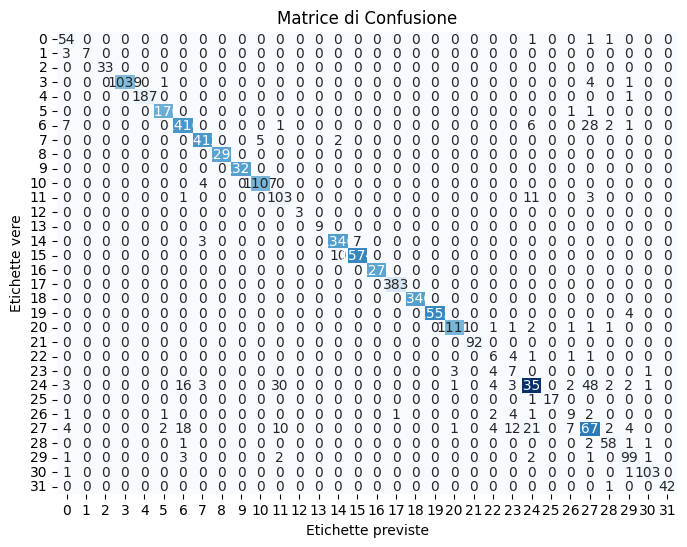

In [32]:
model_name = 'rdfor3'
cm = confusion_matrix_[model_name]

#Matrice di Confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=models[model_name].classes_, yticklabels=models[model_name].classes_)
plt.title('Matrice di Confusione')
plt.xlabel('Etichette previste')
plt.ylabel('Etichette vere')
plt.show()

In questa sezione, viene visualizzata l'**importanza delle feature** per il modello **Random Forest** (`rdfor1`). L'importanza delle feature è una metrica che indica quanto una determinata caratteristica contribuisce alla previsione del modello. 

Le caratteristiche più importanti per la previsione avranno un valore maggiore nell'asse delle ascisse, mentre quelle meno influenti saranno più vicine allo zero. Questo grafico è utile per comprendere meglio quali variabili influenzano di più il modello. La visualizzazione è realizzata con un **bar plot** dove ogni barra rappresenta una feature e la lunghezza della barra indica la sua importanza.

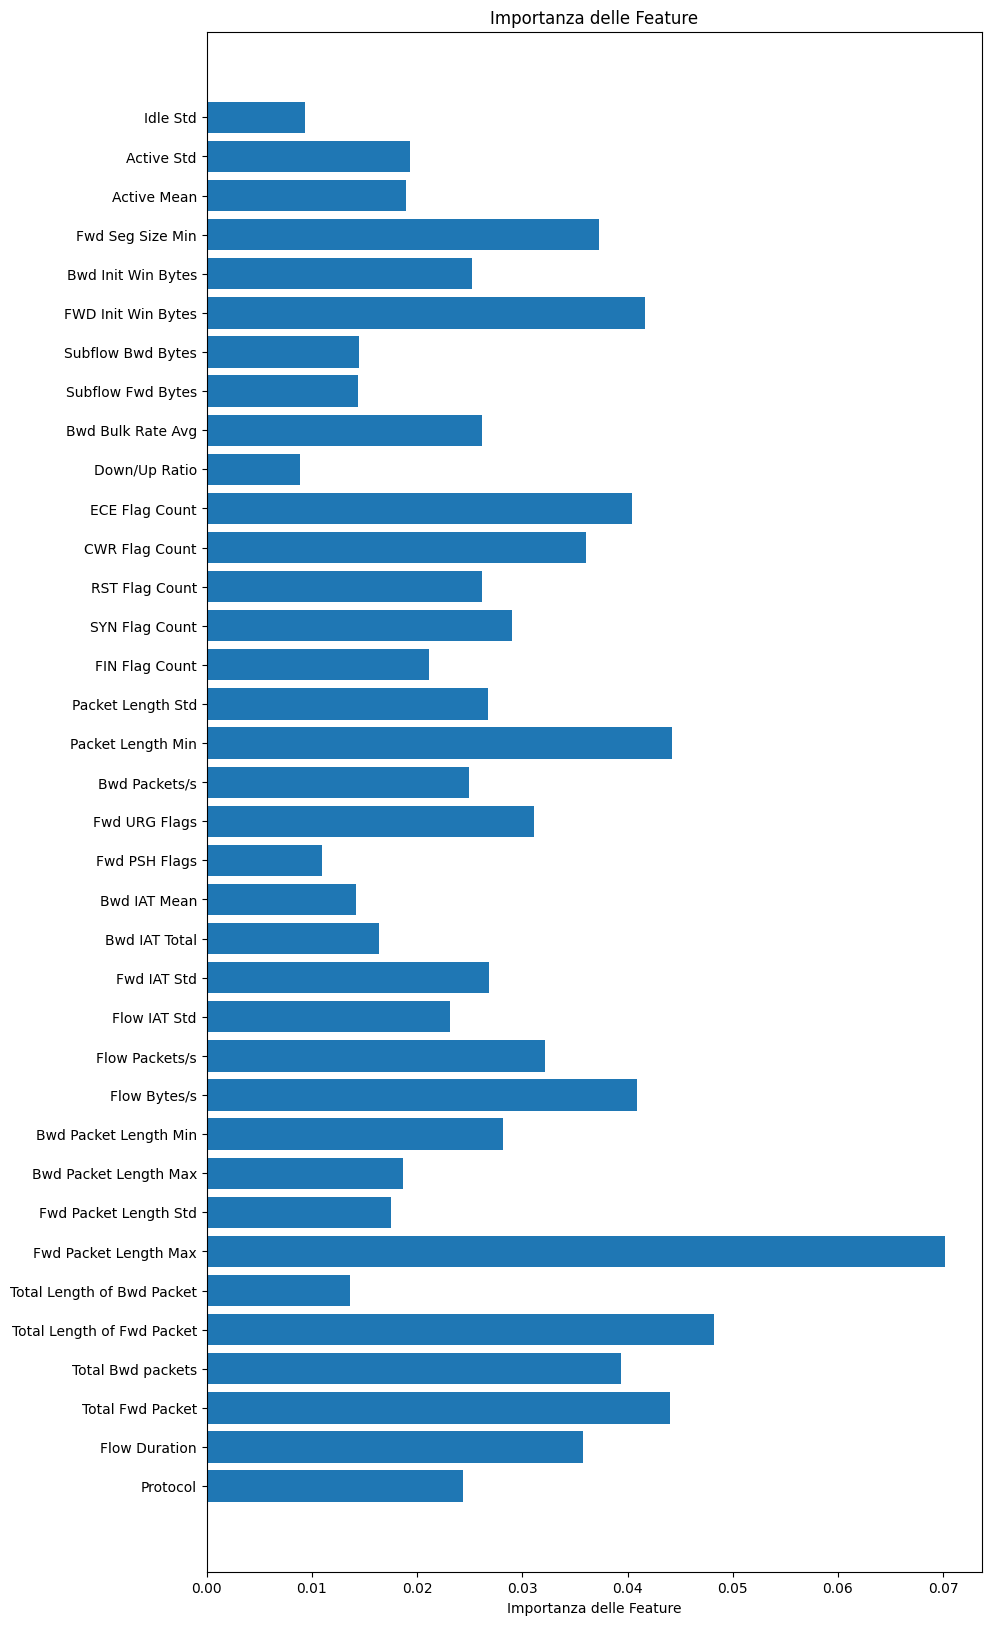

In [33]:
#Specifico il nome del modello
model_name = 'rdfor1'

plt.figure(figsize=(10, 20))

#Grafico sull'importanza delle feature sul modello
importance_rfc = models[model_name].feature_importances_
features = df.columns[:-1]

plt.barh(features, importance_rfc)
plt.xlabel('Importanza delle Feature')
plt.title('Importanza delle Feature')
plt.show()


##  Logistic Regression

In questa sezione vengono addestrati **tre modelli di Logistic Regression**, ciascuno con una configurazione di iperparametri specifica per esplorare il loro impatto sulle performance predittive:

- 🔹 **`C`**: parametro di regularizzazione che controlla il trade-off tra la minimizzazione dell'errore e la complessità del modello (valori più piccoli implicano maggiore regularizzazione).
- 🔹 **`penalty`**: tipo di penalizzazione utilizzata per la regularizzazione del modello. Qui `l2` indica una penalizzazione quadratica.
- 🔹 **`solver`**: algoritmo utilizzato per l'ottimizzazione. In questo caso, `lbfgs` è un algoritmo quasi Newton per la minimizzazione della funzione di costo.
- 🔹 **`max_iter`**: numero massimo di iterazioni per la convergenza del modello (è stato aumentato per garantire una convergenza stabile).
- 🔹 **`class_weight`**: bilanciamento automatico delle classi. Qui è impostato su `None` (senza bilanciamento).

In [34]:
# Iperparametri semplificati per la regressione logistica
hyperparameters = [
    {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 1000, 'class_weight': None}, # Iterazioni aumentate per migliorare la convergenza
    {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'max_iter': 1000, 'class_weight': 'balanced'}, # Configurazione predefinita con iterazioni aumentate
    {'C': 10, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 1000, 'class_weight': None}, # Iterazioni alte per una migliore convergenza
]

# Aggiungi il pre-processing per scalare i dati (se necessario)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ciclo per creare e addestrare i modelli
for i in range(3):
    # Crea e addestra il modello (Regressione Logistica)
    model = LogisticRegression(random_state=42, **hyperparameters[i])
    model.fit(X_train_scaled, y_train)  # Usa i dati scalati
    
    # Salva il modello nel dizionario con un nome univoco
    models[f'logreg{i+1}'] = model

# Stampa di conferma
print("Modelli addestrati e salvati nel dizionario 'models'.")

Modelli addestrati e salvati nel dizionario 'models'.


Calcolo le metriche relative ad: `accuracy`, `f1`, `precision`, `curva ROC`, `matrice di confusione` e `classification report` per valutare il modello addestrato.

In [35]:
# Ciclo attraverso i modelli logreg1, logreg2, logreg3, ecc. (Modelli di regressione logistica)
for i in range(1, 4):
    model_name = f'logreg{i}'
    
    # Prevedi utilizzando il modello
    y_pred = models[model_name].predict(X_test)
    
    # Calcola le metriche di valutazione
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Gestisci il calcolo del ROC AUC per problemi multi-classe
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Salva la matrice di confusione e il report di classificazione
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)


In [36]:
# Valuta il modello logreg1
model_name = 'logreg3'  # Specifica il nome del modello
print("Modello:", model_name)
print("Accuratezza:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precisione:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Matrice di confusione:\n", confusion_matrix_[model_name])
print("Report di classificazione:\n", classification_reports_[model_name])

Modello: logreg3
Accuratezza: 0.6556904804112746
F1 Score: 0.4665912761126048
Precisione: 0.489925737553474
Recall: 0.5669102230203571
ROC AUC: 0.969500133689827
Matrice di confusione:
 [[29  2  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 1  8  0 ... 22  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]]
Report di classificazione:
               precision    recall  f1-score   support

           0       0.41      0.51      0.46        57
           1       0.20      1.00      0.33        10
           2       0.04      0.03      0.03        33
           3       0.00      0.00      0.00      1045
           4       0.62      0.98      0.76       188
           5       0.97      0.86      0.91      1178
           6       0.48      0.88      0.62      1461
           7       0.49      0.78      0.60      1419
           8       1.00      0.99      1.00      1294
           9       1.00      0.99      1.00      1321
          10       0.90      0.74  

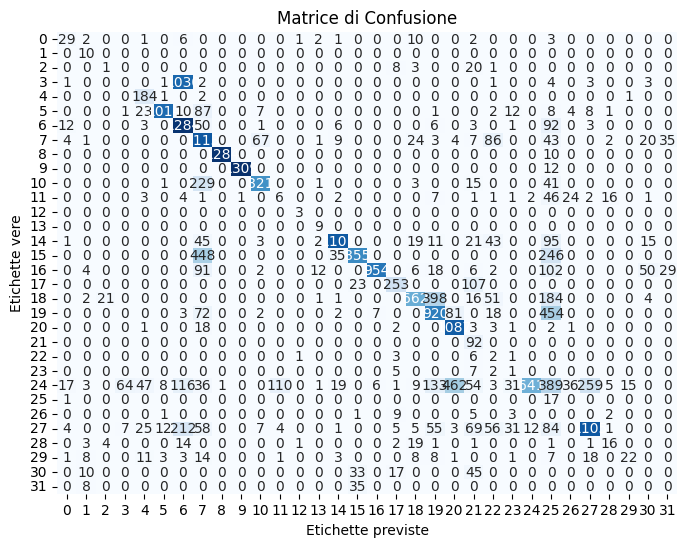

In [37]:
model_name = 'logreg3'
cm = confusion_matrix_[model_name]

#Matrice di Confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=models[model_name].classes_, yticklabels=models[model_name].classes_)
plt.title('Matrice di Confusione')
plt.xlabel('Etichette previste')
plt.ylabel('Etichette vere')
plt.show()

In questo grafico vengono mostrati i valori assoluti dei coefficienti delle variabili di input (features) nel modello di **Regressione Logistica**. I coefficienti della regressione logistica determinano l'effetto di ciascuna caratteristica sull'output del modello, dove il valore assoluto di ciascun coefficiente rappresenta l'importanza della feature:

- Le **feature più importanti** sono quelle che hanno i coefficienti più grandi (in valore assoluto).
- Le **feature meno importanti**

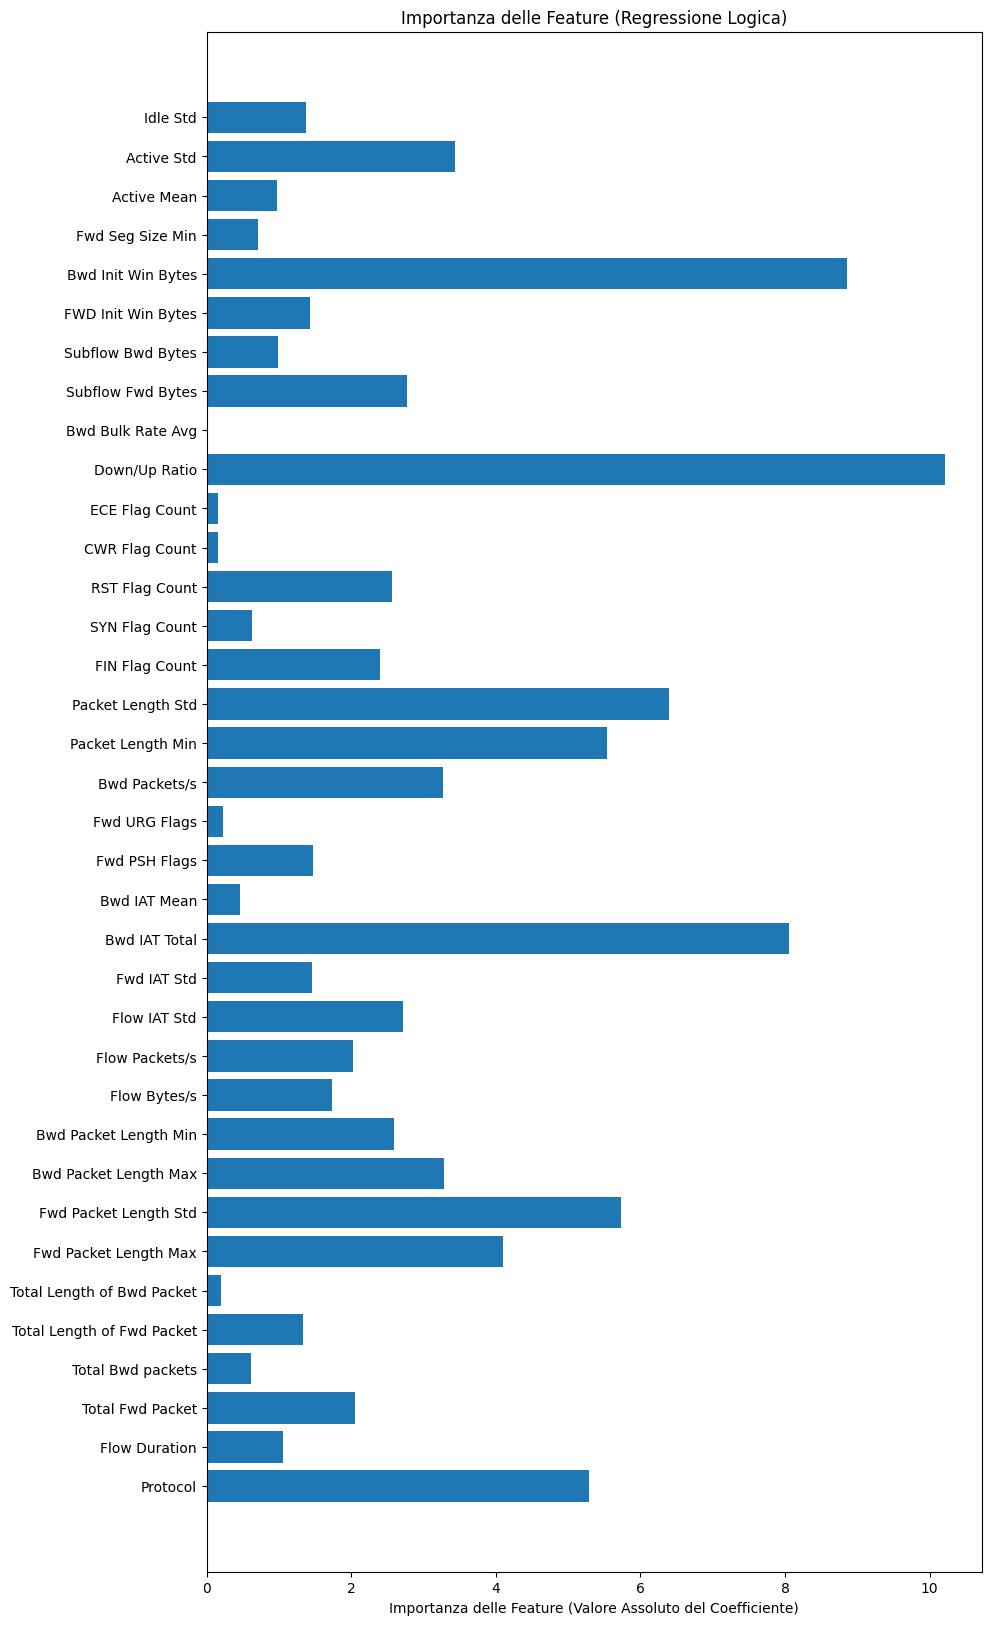

In [38]:
#Nome del modello
model_name = 'logreg1'

plt.figure(figsize=(10, 20))

importance_logreg = abs(models[model_name].coef_[0])  # Prendi i valori assoluti dei coefficienti
features = df.columns[:-1]  # Ottieni i nomi delle caratteristiche

#Grafico
plt.barh(features, importance_logreg)
plt.xlabel('Importanza delle Feature (Valore Assoluto del Coefficiente)')
plt.title('Importanza delle Feature (Regressione Logica)')
plt.show()

## Gaussian Naive Bayes

Vengono addestrati **tre modelli Gaussian Naive Bayes** con diverse configurazioni per esplorare l'impatto del parametro di smussamento `var_smoothing` sulle prestazioni del modello. Questo parametro serve a stabilizzare il modello quando i dati hanno variabilità elevata o rumore.

### Iperparametri utilizzati:
- **`var_smoothing`**: Parametro che controlla il livello di smussamento dei dati:
  - Un valore **basso** permette al modello di catturare variazioni sottili nei dati, ma rischia di essere più sensibile al rumore.
  - Un valore **alto** rende il modello più stabile, ma potrebbe compromettere la sua capacità di adattarsi a variazioni fini nei dati.

In [39]:
hyperparameters = [
    {},  # Configurazione predefinita
    {'var_smoothing': 1e-12},  # Smussamento minimo per permettere al modello di catturare variazioni sottili, massimizzando la capacità.
    {'var_smoothing': 1e-3},  # Smussamento più elevato per maggiore stabilità, specialmente con dataset piccoli.
]

# Ciclo per creare e addestrare 3 modelli
for i in range(3):
    # Crea e allena il modello (Gaussian Naive Bayes)
    model = GaussianNB(**hyperparameters[i])
    model.fit(X_train, y_train)

    # Salva il modello nel dizionario con un nome univoco
    models[f'gnb{i+1}'] = model

# Stampa conferma
print("Modelli addestrati e salvati nel dizionario 'models'.")

Modelli addestrati e salvati nel dizionario 'models'.


Calcolo le metriche relative ad: `accuracy`, `f1`, `precision`, `curva ROC`, `matrice di confusione` e `classification report` per valutare il modello addestrato.

In [40]:
# Ciclo attraverso i modelli gnb1, gnb2, gnb3, ecc. (modelli Gaussian Naive Bayes)
for i in range(1, 4):
    model_name = f'gnb{i}'  # Cambiato da logreg a gnb
    
    # Previsione utilizzando il modello
    y_pred = models[model_name].predict(X_test)
    
    # Calcolo delle metriche di valutazione
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Gestione del calcolo ROC AUC per problemi multi-classe
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Salvataggio della matrice di confusione e del report di classificazione
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

In [41]:
# Valutazione del modello gnb1
model_name = 'gnb2'
print("Modello:", model_name)
print("Accuratezza:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precisione:", precision_[model_name])
print("Richiamo:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Matrice di confusione:\n", confusion_matrix_[model_name])
print("Report di classificazione:\n", classification_reports_[model_name])

Modello: gnb2
Accuratezza: 0.7494681794008154
F1 Score: 0.6436636057805708
Precisione: 0.7129998176511301
Richiamo: 0.7242868833641536
ROC AUC: 0.9623064339446961
Matrice di confusione:
 [[37  2  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 32 ...  0  0  0]
 ...
 [ 0  8  0 ... 37  0  0]
 [ 0 10  0 ...  0  2 31]
 [ 0  8  0 ...  0  0 35]]
Report di classificazione:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75        57
           1       0.17      1.00      0.29        10
           2       0.97      0.97      0.97        33
           3       1.00      0.97      0.99      1045
           4       0.95      0.99      0.97       188
           5       0.85      0.55      0.67      1178
           6       0.64      0.88      0.74      1461
           7       0.59      0.03      0.06      1419
           8       0.93      1.00      0.96      1294
           9       0.98      1.00      0.99      1321
          10       0.90      1.00 

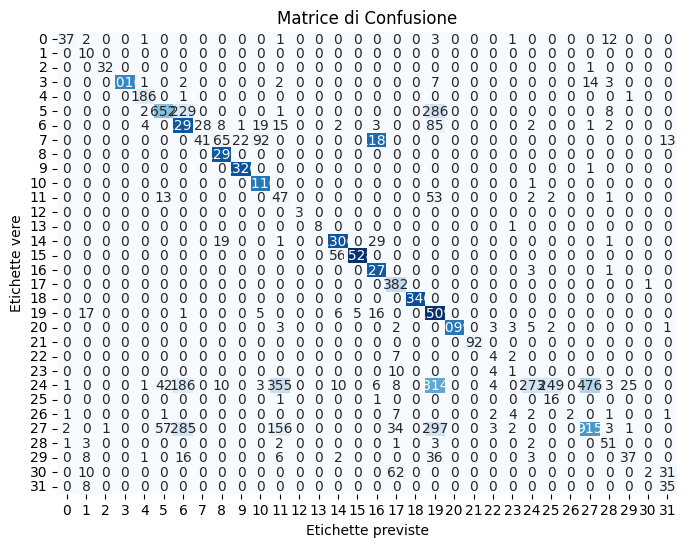

In [42]:
model_name = 'gnb2'
cm = confusion_matrix_[model_name]

#Matrice di Confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=models[model_name].classes_, yticklabels=models[model_name].classes_)
plt.title('Matrice di Confusione')
plt.xlabel('Etichette previste')
plt.ylabel('Etichette vere')
plt.show()

In questa sezione vengono visualizzati i **valori medi** e **di varianza** delle caratteristiche per ciascuna classe nel modello **Gaussian Naive Bayes**. Questo aiuta a comprendere come le caratteristiche influenzano ciascuna classe e a identificare eventuali differenze tra di esse.

 Grafico 1: **Valori medi delle caratteristiche per classe**
- Ogni barra rappresenta il valore medio di una caratteristica per una determinata classe.

 Grafico 2: **Varianza delle caratteristiche per classe**
- Ogni barra rappresenta la varianza delle caratteristiche per una determinata classe, evidenziando la dispersione dei dati per ciascuna classe.

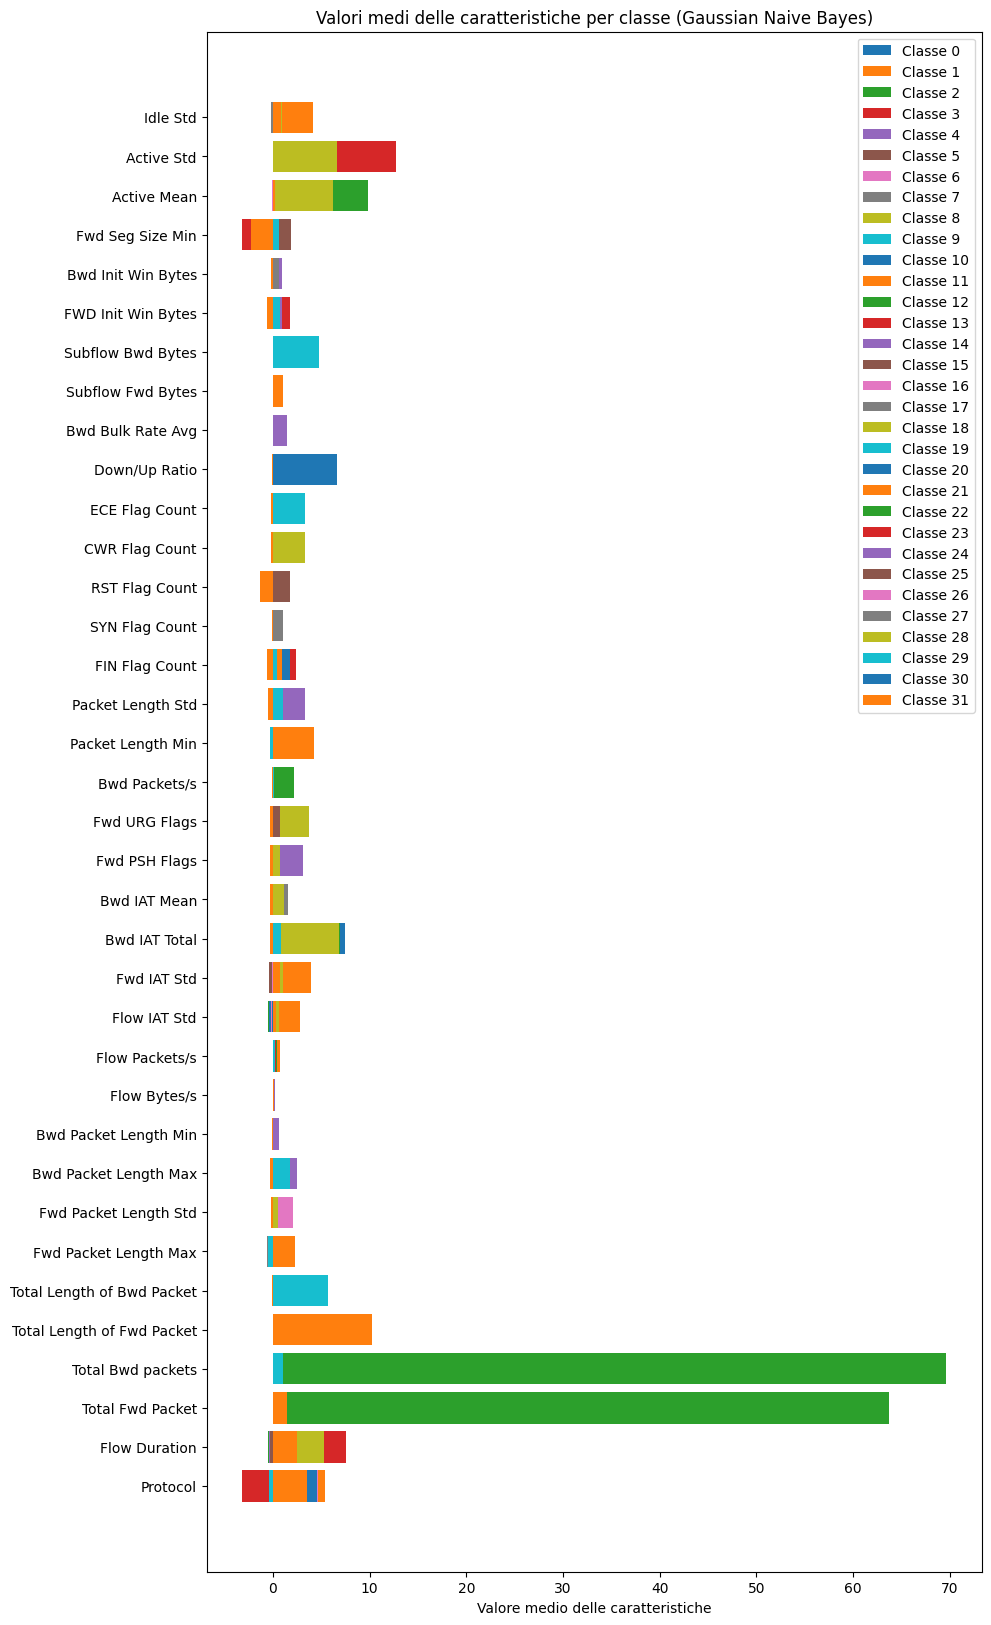

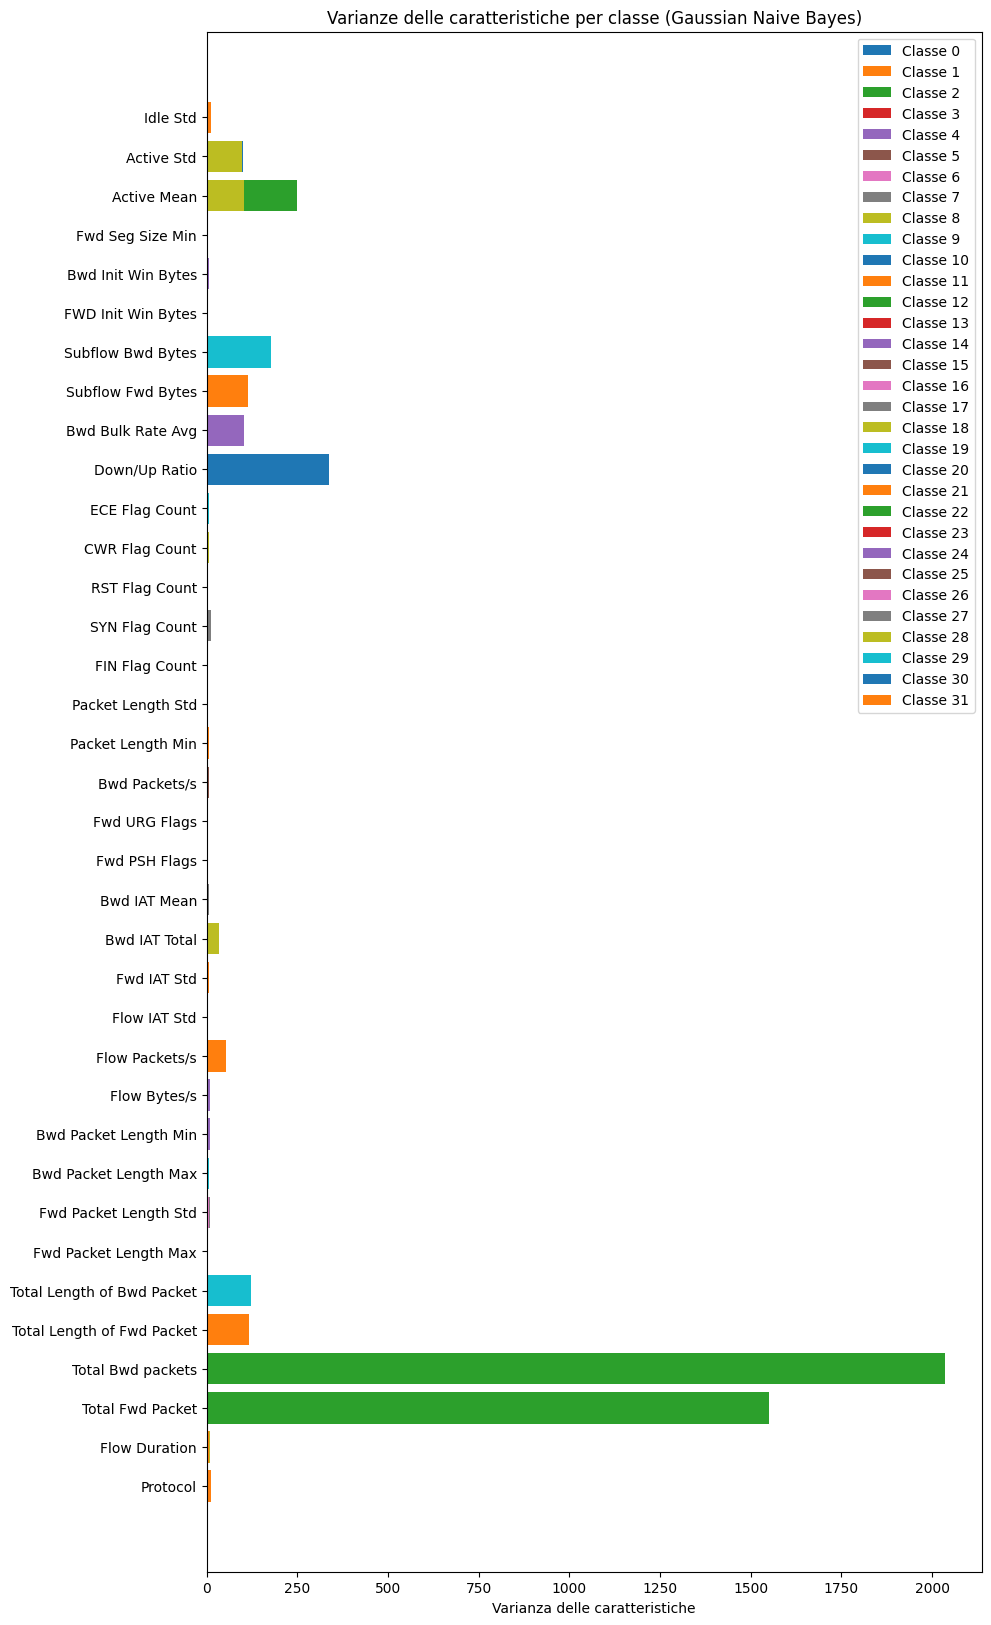

In [43]:
model_name = 'gnb1'  # Specifica il nome del modello
model = models[model_name] 

# Ottieni la media e la varianza di ciascuna caratteristica per ogni classe
class_means = model.theta_ 
class_variances = model.var_
 # Ottieni i nomi delle caratteristiche (presumendo che l'ultima colonna sia il target)
features = df.columns[:-1]

# Numero di classi e caratteristiche
n_classes = class_means.shape[0]
n_features = class_means.shape[1]

# Grafico dei valori medi delle caratteristiche per ciascuna classe
plt.figure(figsize=(10, 20))

for i in range(n_classes):
    plt.barh(features, class_means[i], label=f'Classe {i}')

plt.xlabel('Valore medio delle caratteristiche')
plt.title('Valori medi delle caratteristiche per classe (Gaussian Naive Bayes)')
plt.legend()
plt.show()

# Grafico dei valori di varianza delle caratteristiche per ciascuna classe
plt.figure(figsize=(10, 20))

for i in range(n_classes):
    plt.barh(features, class_variances[i], label=f'Classe {i}')

plt.xlabel('Varianza delle caratteristiche')
plt.title('Varianze delle caratteristiche per classe (Gaussian Naive Bayes)')
plt.legend()
plt.show()


## XGBoost - Modelli con Diversi Iperparametri

In questa sezione vengono creati e addestrati **tre modelli XGBoost** con configurazioni di **iperparametri** differenti. L'obiettivo è esplorare l'impatto di diverse configurazioni sulla performance del modello. I parametri utilizzati per ciascun modello sono:

- 🔹 **`n_estimators`**: Numero di alberi nella foresta (un numero maggiore migliora la stabilità, ma aumenta il costo computazionale).
- 🔹 **`max_depth`**: Profondità massima degli alberi (alberi più profondi catturano maggiore complessità ma rischiano overfitting).
- 🔹 **`min_child_weight`**: Peso minimo richiesto in un nodo per creare un ramo (controlla la complessità degli alberi).
- 🔹 **`learning_rate`**: Tasso di apprendimento (determina quanto velocemente il modello impara dai dati).
- 🔹 **`subsample`**: Percentuale di campioni da utilizzare per addestrare ciascun albero (prevenzione dell'overfitting).

In [44]:
# Iperparametri per XGBoost
hyperparameters = [
    {'n_estimators': 30, 'max_depth': 2, 'min_child_weight': 15, 'learning_rate': 0.3, 'subsample': 0.8}, # Numero inferiore di stimatori, albero più profondo, tasso di apprendimento moderato.
    {'n_estimators': 40, 'max_depth': 2, 'min_child_weight': 20, 'learning_rate': 0.25, 'subsample': 0.8}, # Più alberi e tasso di apprendimento ridotto per una migliore generalizzazione.
    {'n_estimators': 50, 'max_depth': 2, 'min_child_weight': 25, 'learning_rate': 0.2, 'subsample': 0.8}  # Alberi aumentati, tasso di apprendimento ulteriormente ridotto per un apprendimento più cautelativo.
]

# Ciclo per creare e allenare 3 modelli
for i in range(3):
    # Crea e allena il modello
    model = XGBClassifier(random_state=42, verbosity=0, **hyperparameters[i])
    model.fit(X_train, y_train)

    # Memorizza il modello nel dizionario con un nome univoco
    models[f'xgb{i+1}'] = model

# Conferma della creazione dei modelli
print("I modelli sono stati allenati e memorizzati nel dizionario 'models'.")

I modelli sono stati allenati e memorizzati nel dizionario 'models'.


Calcolo le metriche relative ad: `accuracy`, `f1`, `precision`, `curva ROC`, `matrice di confusione` e `classification report` per valutare il modello addestrato.

In [45]:
# Ciclo attraverso i modelli xgb1, xgb2, xgb3, ecc. (modelli XGBoost)
for i in range(1, 4):
    model_name = f'xgb{i}'  # Cambiato da gnb a xgb
    
    # Predizione usando il modello
    y_pred = models[model_name].predict(X_test)
    
    # Calcolo delle metriche di valutazione
    accuracy_[model_name] = accuracy_score(y_test, y_pred)
    f1_[model_name] = f1_score(y_test, y_pred, average='macro')
    precision_[model_name] = precision_score(y_test, y_pred, average='macro')
    recall_[model_name] = recall_score(y_test, y_pred, average='macro')
    
    # Calcolo dell'ROC AUC per classi multiple
    if len(np.unique(y_test)) > 2:
        roc_auc_[model_name] = roc_auc_score(
            y_test, models[model_name].predict_proba(X_test), multi_class='ovr', average='macro'
        )
    else:
        roc_auc_[model_name] = roc_auc_score(y_test, models[model_name].predict_proba(X_test)[:, 1])
    
    # Memorizza la matrice di confusione e il report di classificazione
    confusion_matrix_[model_name] = confusion_matrix(y_test, y_pred)
    classification_reports_[model_name] = classification_report(y_test, y_pred)

In [46]:
# Valutazione del modello xgb1
model_name = 'xgb3'  # Specifica il nome del modello
print("Model:", model_name)
print("Accuracy:", accuracy_[model_name])
print("F1 Score:", f1_[model_name])
print("Precision:", precision_[model_name])
print("Recall:", recall_[model_name])
print("ROC AUC:", roc_auc_[model_name])
print("Confusion Matrix:\n", confusion_matrix_[model_name])
print("Classification Report:\n", classification_reports_[model_name])

Model: xgb3
Accuracy: 0.9673816699166814
F1 Score: 0.8774035173554472
Precision: 0.8586089269112192
Recall: 0.9204436958334701
ROC AUC: 0.9991152240067216
Confusion Matrix:
 [[ 52   0   0 ...   0   0   0]
 [  0  10   0 ...   0   0   0]
 [  0   0  33 ...   0   0   0]
 ...
 [  0   4   0 ...  94   2   0]
 [  0   4   0 ...   1 100   0]
 [  0   0   0 ...   0   0  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        57
           1       0.56      1.00      0.71        10
           2       1.00      1.00      1.00        33
           3       1.00      0.99      1.00      1045
           4       1.00      0.99      1.00       188
           5       0.95      0.99      0.97      1178
           6       1.00      0.95      0.97      1461
           7       0.95      0.96      0.96      1419
           8       1.00      1.00      1.00      1294
           9       1.00      1.00      1.00      1321
          10   

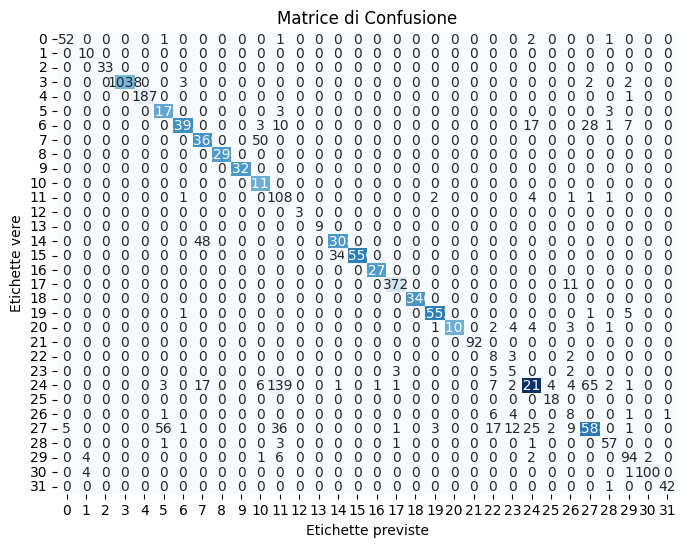

In [47]:
model_name = 'xgb3'
cm = confusion_matrix_[model_name]

#Matrice di Confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=models[model_name].classes_, yticklabels=models[model_name].classes_)
plt.title('Matrice di Confusione')
plt.xlabel('Etichette previste')
plt.ylabel('Etichette vere')
plt.show()

# Confronto Grafico tra Modelli

In questo documento vengono confrontati i risultati di diversi modelli attraverso tre grafici, ognuno focalizzato su una metrica di valutazione specifica:

- **Grafico 1: Accuratezza (Accuracy)**  
  Viene visualizzata l'accuratezza dei vari modelli, che rappresenta la proporzione di previsioni corrette rispetto al numero totale di previsioni. Un'alta accuratezza indica che il modello è stato in grado di fare previsioni corrette per la maggior parte dei dati.

- **Grafico 2: Precisione, Recall e F1 Score**  
  Questo grafico confronta le tre metriche principali: precisione, recall e F1 score.  
  - **Precisione**: la percentuale di istanze correttamente classificate come positive tra tutte quelle etichettate come positive.  
  - **Recall**: la percentuale di istanze effettivamente positive che sono state correttamente identificate dal modello.  
  - **F1 Score**: la media armonica tra precisione e recall, utile per bilanciare queste due metriche.

- **Grafico 3: ROC AUC**  
  Il grafico mostra il valore della **ROC AUC**, che misura la capacità del modello di distinguere tra le classi. Un valore più alto di ROC AUC indica che il modello ha una migliore capacità di classificare correttamente le istanze.


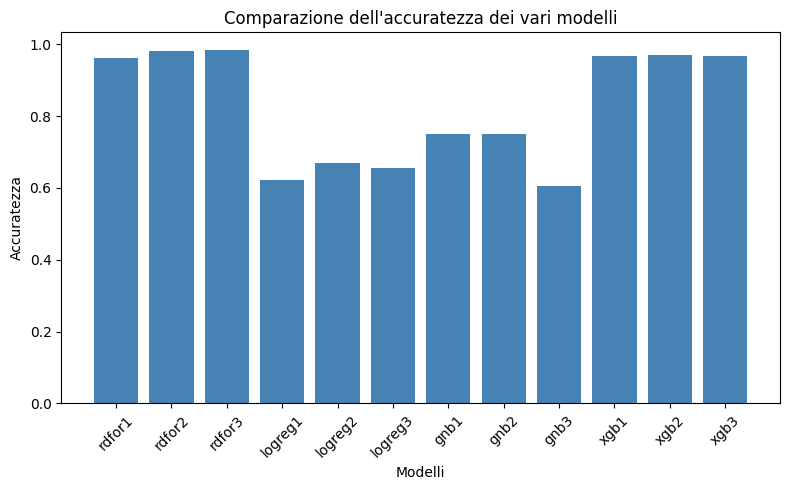

In [48]:
# Creazione DataFrame delle metriche
metrics_df = pd.DataFrame({
    'Model': list(accuracy_.keys()),
    'Accuracy': list(accuracy_.values())
})

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='steelblue')
plt.xlabel('Modelli')
plt.ylabel('Accuratezza')
plt.title('Comparazione dell\'accuratezza dei vari modelli')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

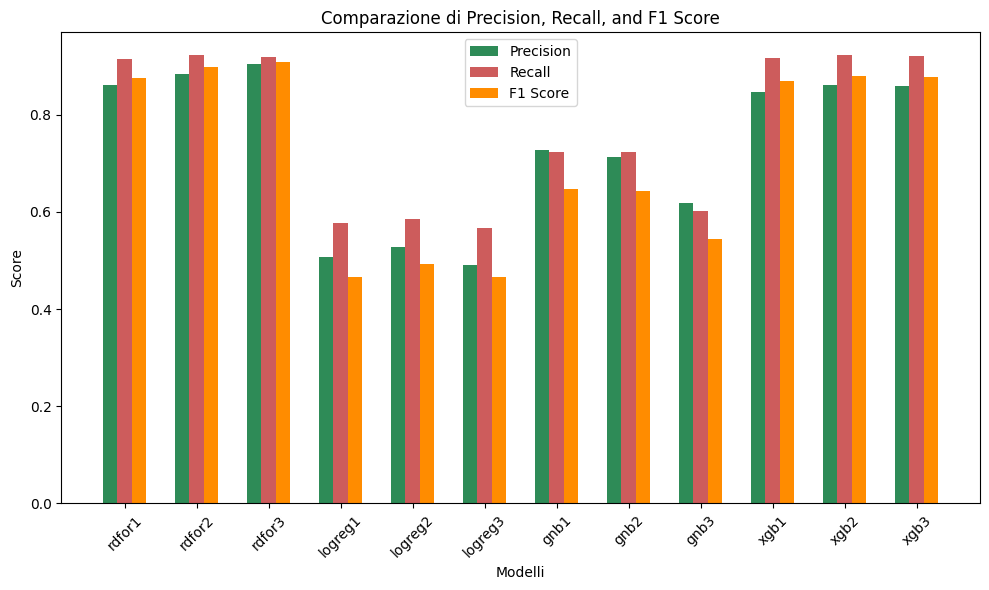

In [49]:
# Creazione DataFrame delle metriche
metrics_df = pd.DataFrame({
    'Model': list(precision_.keys()),
    'Precision': list(precision_.values()),
    'Recall': list(recall_.values()),
    'F1 Score': list(f1_.values())
})

# Plot
x = np.arange(len(metrics_df))  # Indici dei modelli
bar_width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, metrics_df['Precision'], width=bar_width, label='Precision', color='seagreen')
plt.bar(x, metrics_df['Recall'], width=bar_width, label='Recall', color='indianred')
plt.bar(x + bar_width, metrics_df['F1 Score'], width=bar_width, label='F1 Score', color='darkorange')

plt.xlabel('Modelli')
plt.ylabel('Score')
plt.title('Comparazione di Precision, Recall, and F1 Score')
plt.xticks(x, metrics_df['Model'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


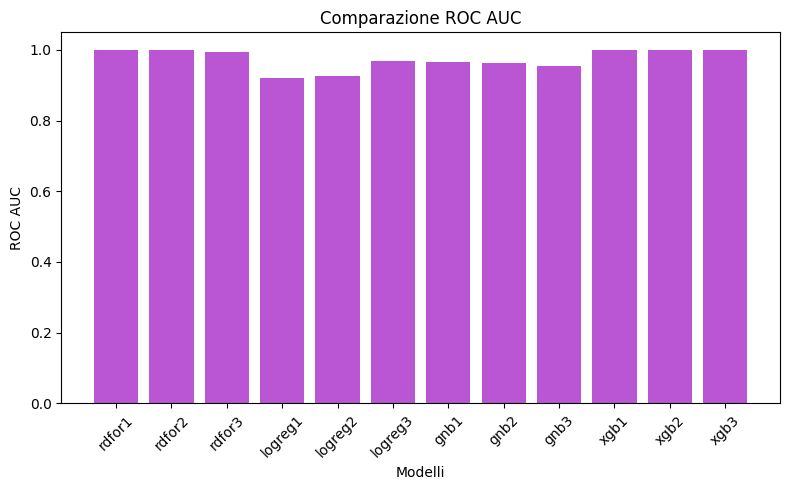

In [50]:
# Creazione DataFrame della ROC AUC
metrics_df = pd.DataFrame({
    'Model': list(roc_auc_.keys()),
    'ROC AUC': list(roc_auc_.values())
})

# Plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['ROC AUC'], color='mediumorchid')
plt.xlabel('Modelli')
plt.ylabel('ROC AUC')
plt.title('Comparazione ROC AUC')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
